In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [142]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [143]:
data.corr()


<ipython-input-143-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [144]:
data.shape

(1761, 7)

In [145]:
data['Date'] = pd.to_datetime(data['Date'],
                              infer_datetime_format=True)
data.set_index('Date', inplace=True)

data.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [146]:
data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [147]:
data = data.dropna()

In [148]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

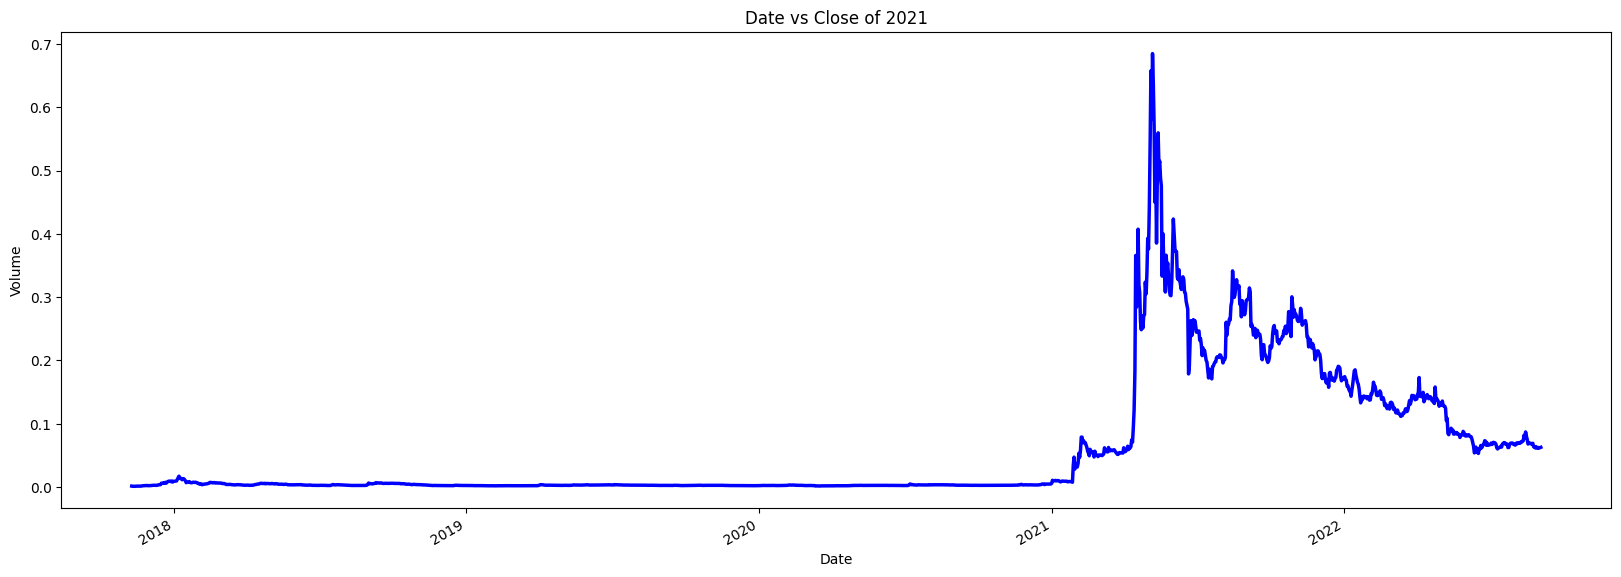

In [149]:
plt.figure(figsize=(20, 7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

In [150]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

In [151]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [165]:
df2 = data.tail(1761)
train = df2[:1400]
test = df2[-361:]

print(train.shape, test.shape)

(1400, 5) (361, 5)


In [155]:
print("Train Data:")
print(train)

Train Data:
               Close        Volume           gap         a             b
Date                                                                    
2021-04-22  0.260967  1.187982e+10  6.234650e+08  1.204783  1.431261e+10
2021-04-23  0.248509  1.616557e+10  1.692680e+09  1.639761  2.650766e+10
2021-04-24  0.270212  1.105758e+10  6.579149e+08  1.258814  1.391943e+10
2021-04-25  0.251111  6.849915e+09  4.279142e+08  1.276048  8.740822e+09
2021-04-26  0.270674  5.118887e+09  1.659850e+08  1.130736  5.788111e+09
...              ...           ...           ...       ...           ...
2022-05-22  0.086105  3.750260e+08  9.083130e+05  1.028813  3.858318e+08
2022-05-23  0.083253  5.073852e+08  2.664787e+06  1.063386  5.395461e+08
2022-05-24  0.083637  4.624157e+08  1.621230e+06  1.043385  4.824777e+08
2022-05-25  0.082985  4.198348e+08  8.476464e+05  1.024527  4.301318e+08
2022-05-26  0.078252  7.118909e+08  5.364098e+06  1.099060  7.824108e+08

[400 rows x 5 columns]


In [156]:
print("Test Data:")
print(test)

Test Data:
               Close        Volume           gap         a             b
Date                                                                    
2022-05-27  0.081335  1.310058e+09  1.153113e+07  1.114936  1.460630e+09
2022-05-28  0.081839  5.355396e+08  1.015919e+06  1.023376  5.480585e+08
2022-05-29  0.082686  3.949625e+08  1.080222e+06  1.034060  4.084150e+08
2022-05-30  0.087871  6.906968e+08  4.148325e+06  1.073004  7.411207e+08
2022-05-31  0.085865  6.724446e+08  3.105349e+06  1.055231  7.095846e+08
...              ...           ...           ...       ...           ...
2022-08-30  0.061525  3.289347e+08  1.269030e+06  1.063716  3.498931e+08
2022-08-31  0.061330  3.097487e+08  7.046783e+05  1.037260  3.212898e+08
2022-09-01  0.062372  3.287654e+08  7.512290e+05  1.037961  3.412455e+08
2022-09-02  0.061635  2.734530e+08  4.826446e+05  1.028960  2.813721e+08
2022-09-04  0.062696  2.975134e+08  2.290853e+04  1.001229  2.978790e+08

[100 rows x 5 columns]


In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiz

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1400
Model:               SARIMAX(2, 1, 1)   Log Likelihood                4388.959
Date:                Sun, 05 Nov 2023   AIC                          -8761.918
Time:                        06:55:59   BIC                          -8719.970
Sample:                    11-09-2017   HQIC                         -8746.237
                         - 09-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume        5.8e-12   7.02e-14     82.601      0.000    5.66e-12    5.94e-12
gap        -6.353e-12   1.91e-13    -33.186      0.000   -6.73e-12   -5.98e-12
a             -0.0140   1.81e-23  -7.73e+20      0.0

In [167]:
start = 1400
end = 1760
predictions = results.predict(
    start=start,
    end=end,
    exog=test.drop("Close", axis=1))
predictions

2021-09-09    0.257113
2021-09-10    0.251012
2021-09-11    0.250237
2021-09-12    0.248052
2021-09-13    0.248806
                ...   
2022-08-31    0.243156
2022-09-01    0.243431
2022-09-02    0.243522
2022-09-03    0.243356
2022-09-04    0.243880
Freq: D, Name: predicted_mean, Length: 361, dtype: float64

<Axes: xlabel='Date'>

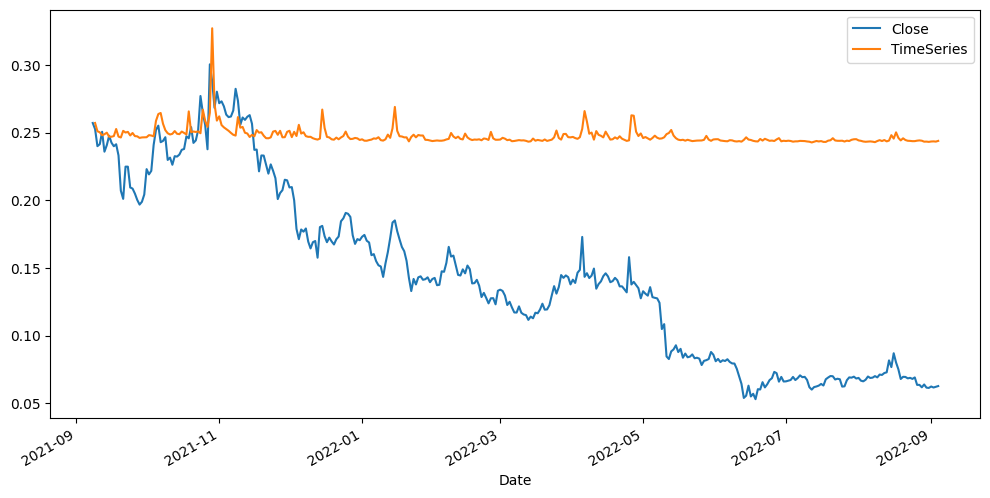

In [168]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)

Mean Squared Error: 0.01437957518099975
Mean Absolute Error: 0.1044321494890261


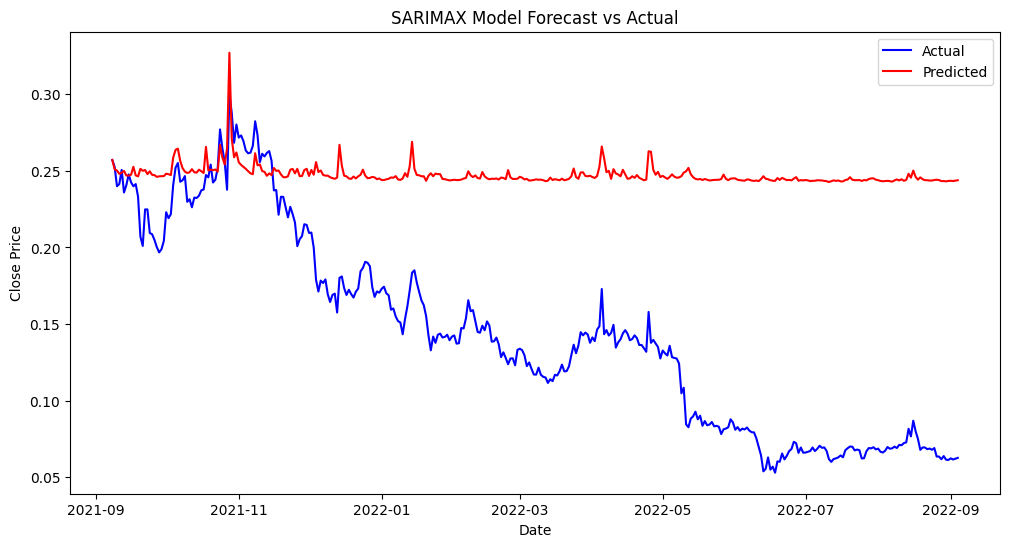

In [170]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score

# Calculate evaluation metrics
mse = mean_squared_error(test["Close"], predictions)
mae = mean_absolute_error(test["Close"], predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(12, 6))
plt.plot(test.index, test["Close"], label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMAX Model Forecast vs Actual')
plt.legend()
plt.show()


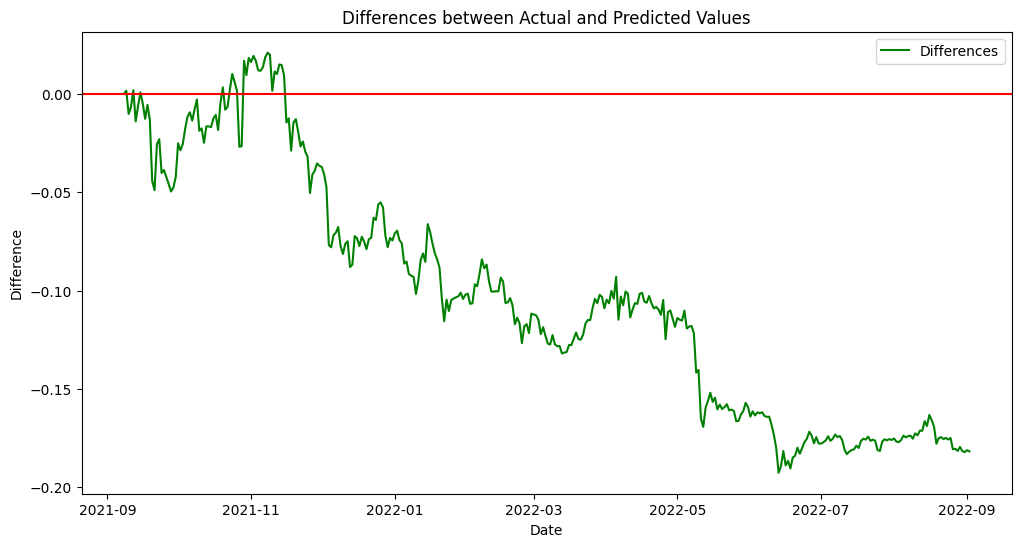

In [171]:
# Adjust the slicing to ensure the lengths are aligned correctly
predictions = results.predict(start=start, end=end, exog=test.drop("Close", axis=1))

# Remove the last element from the test array to align the lengths
test_trimmed = test[:-1]

# Calculate the differences between actual and predicted values
differences = test_trimmed["Close"].values - predictions.values[:-1]  # Adjust the length of predictions.values

# Plot the differences
plt.figure(figsize=(12, 6))
plt.plot(test_trimmed.index, differences, label='Differences', color='green')  # Use test_trimmed.index
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Differences between Actual and Predicted Values')
plt.legend()
plt.show()
